In [2]:
# !pip install emoji

  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193004 sha256=16fef253a1c32e597883e8d414fe07cdeb0b7c92bdbad3f16260b2533d6b1b51
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\23\a5\a8\e74bad1ceced228b6ae94dcbacc5c67df6486fd1620714e7d1
Successfully built emoji


In [4]:
# !pip install wordcloud

In [5]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
# This function is defined to identify date and time in chat
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

# below fnction is used to fetch author name from the given string
def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

    
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message


In [32]:
data = []
conversation = 'WhatsApp Chat with DSA - notes group.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [33]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date      Time           Author  \
727 2022-07-28  10:36 am       Manu Attri   
728 2022-07-28  10:37 am   Lokesh Goswami   
729 2022-07-28  10:38 am     Garima Verma   
730 2022-07-29  10:29 am            Gopal   
731 2022-07-29  10:31 am   Mansi Bhardwaj   
732 2022-07-29  10:31 am  Ranjan Sir YMCA   
733 2022-07-29  10:31 am        Mahima PG   
734 2022-07-29  10:37 am      Gaurav Ccsd   
735 2022-07-29  10:38 am  Ranjan Sir YMCA   
736 2022-07-29  10:39 am      Gaurav Ccsd   
737 2022-07-29  10:40 am  Ranjan Sir YMCA   
738 2022-07-29  10:40 am      Gaurav Ccsd   
739 2022-07-29  11:45 am             None   
740 2022-07-30   8:39 am  Ranjan Sir YMCA   
741 2022-07-30   8:40 am  Ranjan Sir YMCA   
742 2022-07-30   8:44 am      Gaurav Ccsd   
743 2022-07-30   8:46 am  Ranjan Sir YMCA   
744 2022-07-30   8:46 am  Ranjan Sir YMCA   
745 2022-07-30   8:47 am      Gaurav Ccsd   
746 2022-07-30   8:47 am  Ranjan Sir YMCA   

                                               Message

In [34]:
total_messages = df.shape[0]
print(total_messages)

747


In [35]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

141


In [36]:
def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

138


In [42]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("None ,'Lokesh Goswami' ,'Ranjan Sir YMCA', 'Kuldeep Ccsd' ,'Muskaan', 'Garima Verma',\
      'Mahima PG' ,'Gunjan Verma♥️', 'Prateek' ,'Bhavesh Sethi' , 'Pradeep Ccsd' ,'+91 92050 69867', 'Gaurav Ccsd' ,\
      'Dsa Rishu Sir' ,'Gopal', 'Mansi Bhardwaj', 'Manu Attri' ,'Raghav Arora', 'Rashid Ali Dsa' ,'👑ujjwal👑' ,\
      'Asish Sharma Dsa'")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Emojis Shared", emojis)
print("Number of Links Shared", links)

None ,'Lokesh Goswami' ,'Ranjan Sir YMCA', 'Kuldeep Ccsd' ,'Muskaan', 'Garima Verma',      'Mahima PG' ,'Gunjan Verma♥️', 'Prateek' ,'Bhavesh Sethi' , 'Pradeep Ccsd' ,'+91 92050 69867', 'Gaurav Ccsd' ,      'Dsa Rishu Sir' ,'Gopal', 'Mansi Bhardwaj', 'Manu Attri' ,'Raghav Arora', 'Rashid Ali Dsa' ,'👑ujjwal👑' ,      'Asish Sharma Dsa'
Total Messages:  747
Number of Media Shared:  141
Number of Emojis Shared 138
Number of Links Shared 16


In [45]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = [None ,'Lokesh Goswami' ,'Ranjan Sir YMCA', 'Kuldeep Ccsd' ,'Muskaan', 'Garima Verma',\
      'Mahima PG' ,'Gunjan Verma♥️', 'Prateek' ,'Bhavesh Sethi' , 'Pradeep Ccsd' ,'+91 92050 69867', 'Gaurav Ccsd' ,\
      'Dsa Rishu Sir' ,'Gopal', 'Mansi Bhardwaj', 'Manu Attri' ,'Raghav Arora', 'Rashid Ali Dsa' ,'👑ujjwal👑' ,\
      'Asish Sharma Dsa']
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of None -
Messages Sent 0
Average Words per message nan
Media Messages Sent 0
Emojis Sent 0
Links Sent 0
Stats of Lokesh Goswami -
Messages Sent 95
Average Words per message 5.494736842105263
Media Messages Sent 7
Emojis Sent 25
Links Sent 0
Stats of Ranjan Sir YMCA -
Messages Sent 114
Average Words per message 12.289473684210526
Media Messages Sent 8
Emojis Sent 1
Links Sent 2
Stats of Kuldeep Ccsd -
Messages Sent 35
Average Words per message 4.171428571428572
Media Messages Sent 5
Emojis Sent 12
Links Sent 0
Stats of Muskaan -
Messages Sent 20
Average Words per message 12.85
Media Messages Sent 0
Emojis Sent 1
Links Sent 0
Stats of Garima Verma -
Messages Sent 25
Average Words per message 3.36
Media Messages Sent 4
Emojis Sent 17
Links Sent 0
Stats of Mahima PG -
Messages Sent 54
Average Words per message 11.518518518518519
Media Messages Sent 3
Emojis Sent 29
Links Sent 2
Stats of Gunjan Verma♥️ -
Messages Sent 36
Average Words per message 5.027777777777778
Media Messages Sent

<ipython-input-45-af578851a307>:19: RuntimeWarning:

invalid value encountered in longlong_scalars



In [46]:
len(l)

21

In [47]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😂', 23)
('🤣', 22)
('👍', 14)
('😅', 10)
('🎉', 8)
('🙏🏻', 7)
('🥺', 5)
('🙏', 4)
('🌈', 3)
('\U0001f972', 3)
('😊', 3)
('⛹🏻\u200d♂️', 3)
('🙂', 2)
('😁', 2)
('✔️', 2)
('👏🏻', 2)
('👍🏻', 2)
('📊', 2)
('👇', 2)
('🥰', 1)
('😕', 1)
('😇', 1)
('❌', 1)
('✌🏻', 1)
('✔', 1)
('🌻', 1)
('\U0001fae3', 1)
('📖', 1)
('📈', 1)
('📢', 1)
('✨', 1)
('📄', 1)
('🔥', 1)
('☝️', 1)
('🤹\u200d♂️', 1)
('😀', 1)
('😆', 1)
('🏏', 1)


There are 26354 words in all the messages.


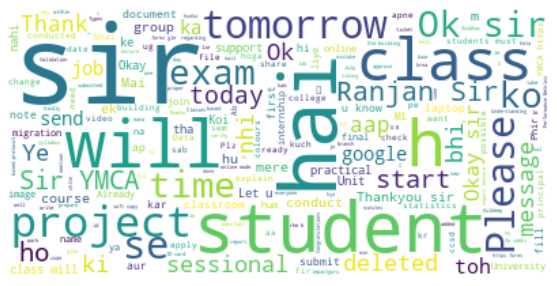

In [48]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 26354 words in all the messages.


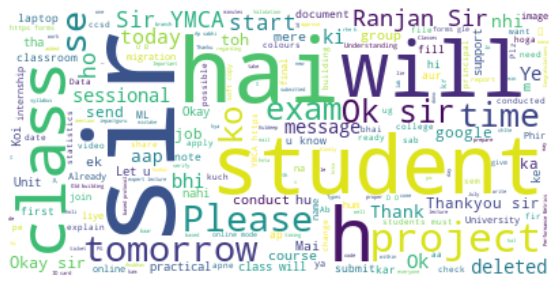

In [49]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name Lokesh Goswami


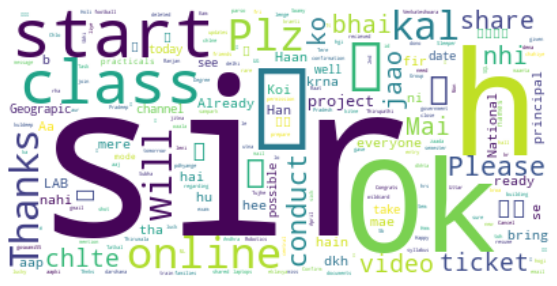

Author name Ranjan Sir YMCA


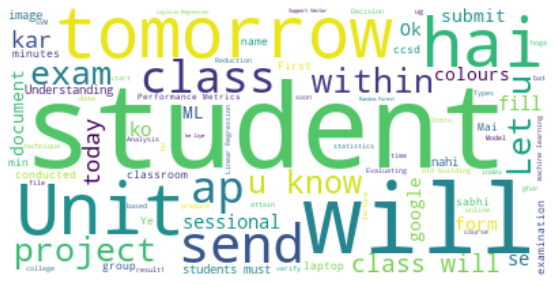

Author name Kuldeep Ccsd


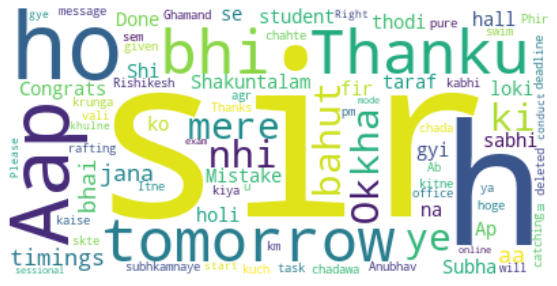

Author name Muskaan


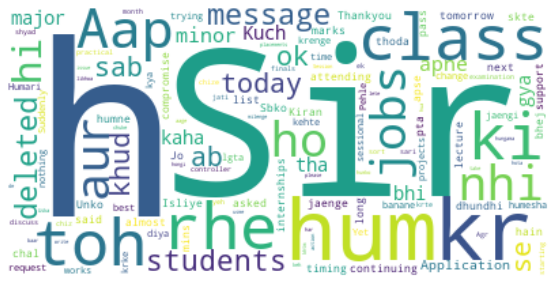

Author name Garima Verma


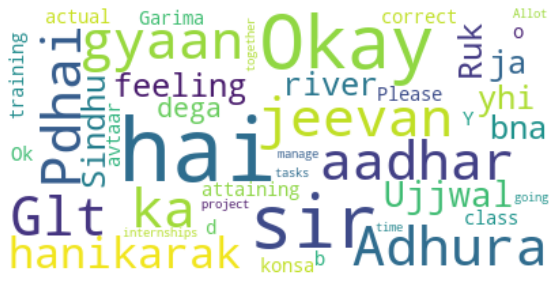

Author name Mahima PG


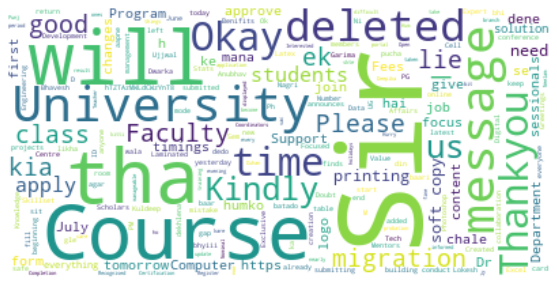

Author name Gunjan Verma♥️


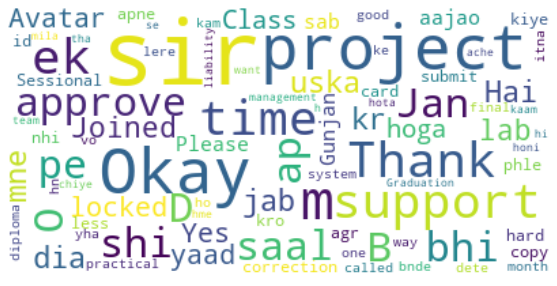

Author name Prateek


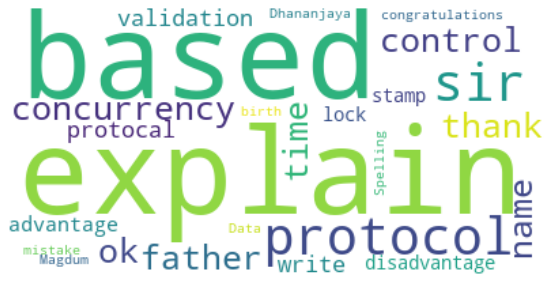

Author name Bhavesh Sethi


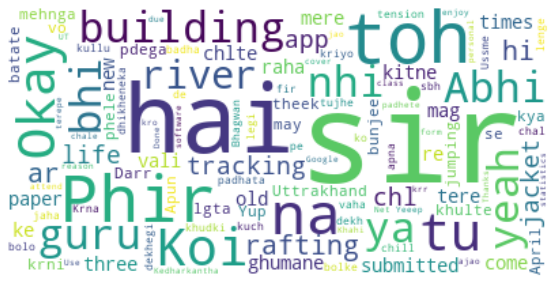

Author name Pradeep Ccsd


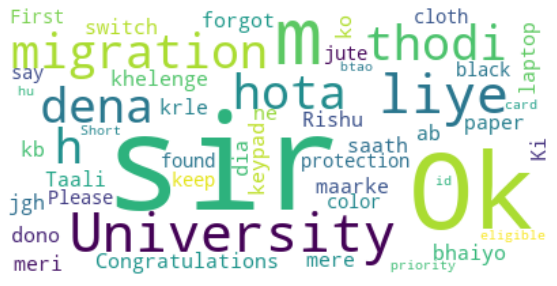

Author name +91 92050 69867


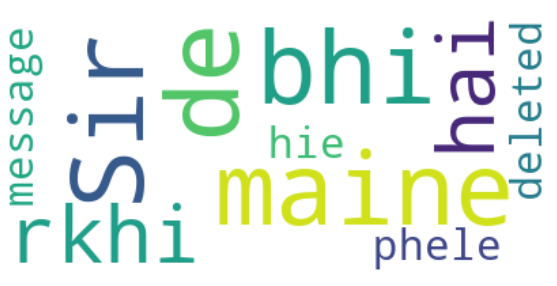

Author name Gaurav Ccsd


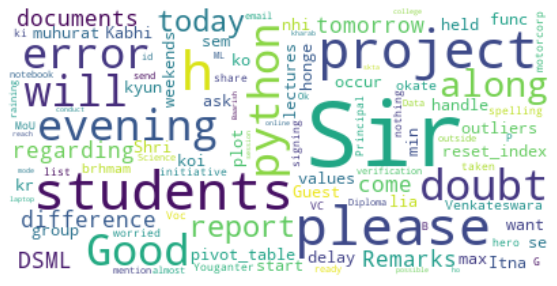

Author name Dsa Rishu Sir


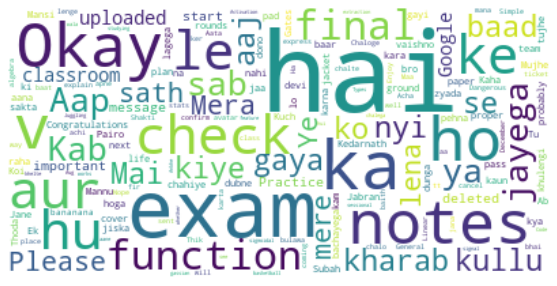

Author name Gopal


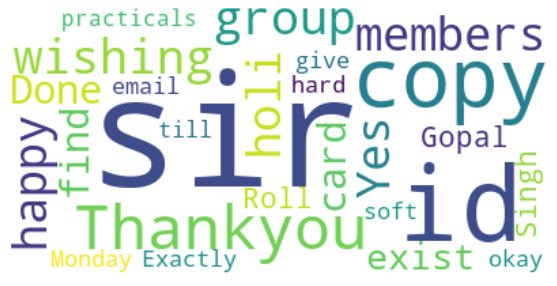

Author name Mansi Bhardwaj


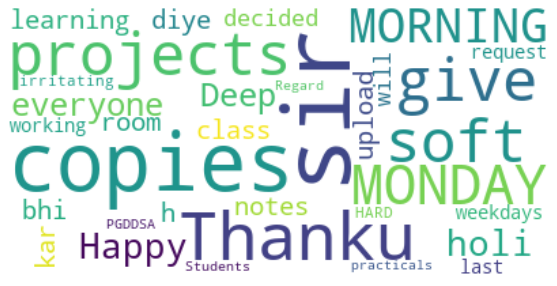

Author name Manu Attri


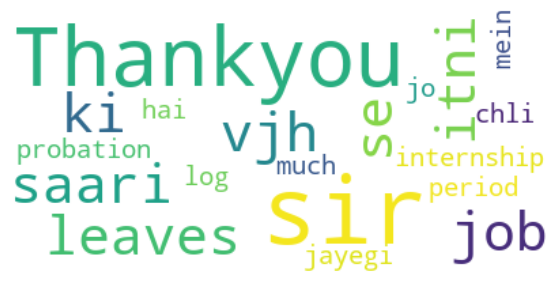

Author name Raghav Arora


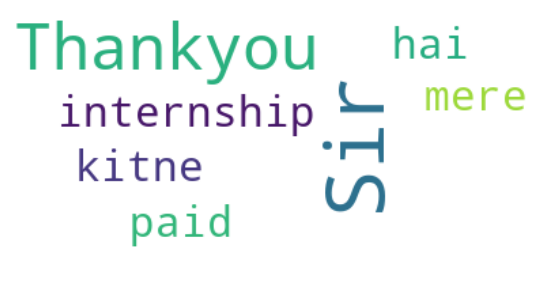

Author name Rashid Ali Dsa


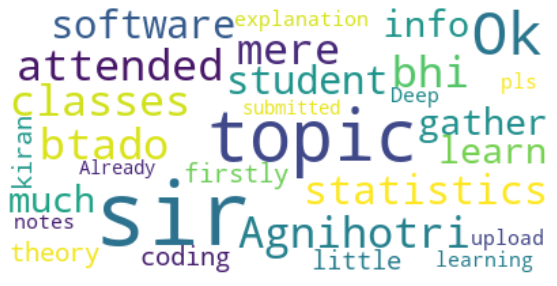

Author name 👑ujjwal👑


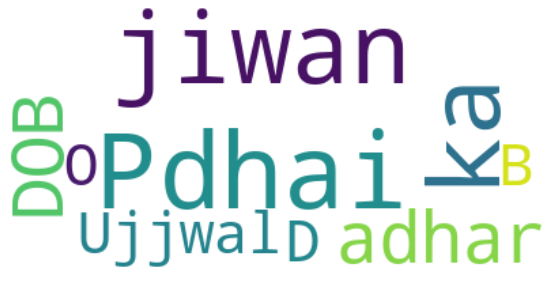

Author name Asish Sharma Dsa


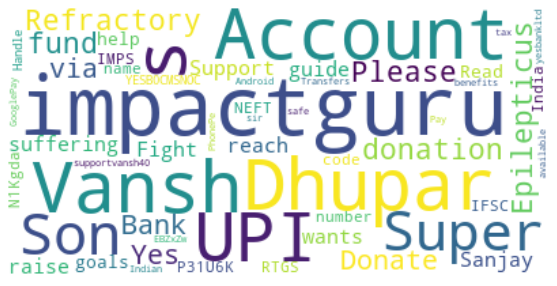

In [57]:
l = [None ,'Lokesh Goswami' ,'Ranjan Sir YMCA', 'Kuldeep Ccsd' ,'Muskaan', 'Garima Verma',\
      'Mahima PG' ,'Gunjan Verma♥️', 'Prateek' ,'Bhavesh Sethi' , 'Pradeep Ccsd' ,'+91 92050 69867', 'Gaurav Ccsd' ,\
      'Dsa Rishu Sir' ,'Gopal', 'Mansi Bhardwaj', 'Manu Attri' ,'Raghav Arora', 'Rashid Ali Dsa' ,'👑ujjwal👑' ,\
      'Asish Sharma Dsa']
for i in range(1,len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()